## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Read data

In [2]:
df = pd.read_csv("50_Startups.csv")
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Plot data

Text(0, 0.5, 'Profit')

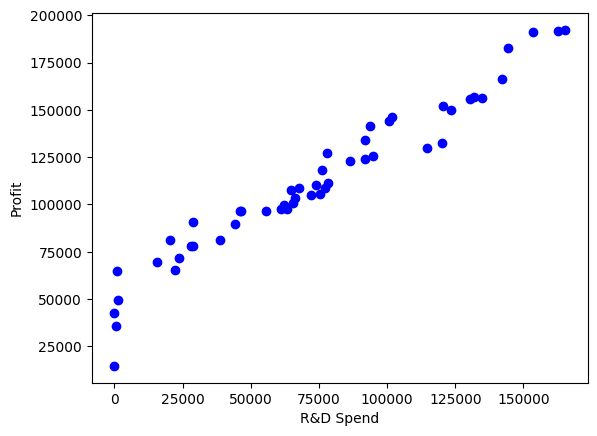

In [3]:
plt.scatter(df["R&D Spend"],df.Profit,color="blue")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

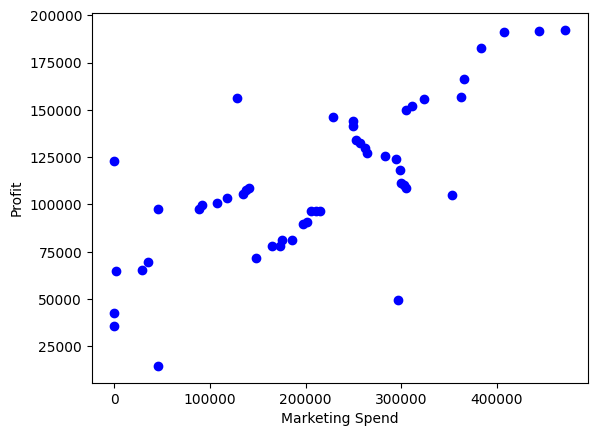

In [6]:
plt.scatter(df["Marketing Spend"],df.Profit,color="blue")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")

## Separate data

In [8]:
cdf = df[["R&D Spend","Marketing Spend","Profit"]]

msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Model

In [9]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[["R&D Spend","Marketing Spend"]])
train_y = np.asanyarray(train[["Profit"]])
reg.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', reg.coef_)

Coefficients:  [[0.80002487 0.03090575]]


## Predict

In [10]:
test_x = np.asanyarray(test[["R&D Spend","Marketing Spend"]])
test_y = np.asanyarray(test[["Profit"]])
y_hat = reg.predict(test_x)
# Resluts
print("Residual sum of squares: %.2f"% np.mean((y_hat - test_y) ** 2))
print('Variance score: %.2f' % reg.score(test_x, test_y))

Residual sum of squares: 32034898.55
Variance score: 0.97
